# SVM Linear and RBF Examples

Import necessary libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

Load the breast cancer dataset; X = data and y = target

In [134]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

Print dataset information

In [136]:
# this cell in complete
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {cancer.feature_names[:5]}...")
print(f"Target names: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
Target names: ['malignant' 'benign']
Class distribution: [212 357]


Split the data into training and testing sets - 70/30; random = 42

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardize features

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train SVM with linear kernel

In [142]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

Train SVM with RBF kernel

In [144]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

Evaluate models

In [146]:
# this cell is complete
print("\nLinear SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))


Linear SVM Results:
Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [52]:
# print RBF results - use example from above
print("\nRBF SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))


RBF SVM Results:
Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In this part of the code, <b>hyperparameter tuning</b> is performed using <b>Grid Search</b>, 
a technique to find the best combination of hyperparameters for a Support Vector Machine (SVM) model.

The param_grid dictionary defines the hyperparameters to be tuned:<br>
<b>C</b>: the regularization parameter that controls the trade-off between a smooth decision boundary and classifying training points correctly.<br>
<b>gamma</b>: the kernel coefficient for the 'rbf' kernel. It determines the impact of individual training samples on shaping the decision boundary. <br>
<b>kernel</b>: Specifies the type of kernel used, in this case, the radial basis function ('rbf').

In [54]:
# this cell is complete
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

<b>GridSearchCV</b> is a function from scikit-learn that performs an exhaustive search over a specified parameter grid to <b>find the best hyperparameters</b> for the SVM model.

<b>SVC()</b>: Specifies the SVM model to be tuned.<br>
<b>param_grid</b>: Specifies the hyperparameter grid to search over.<br>
<b>cv=5</b>: Specifies 5-fold cross-validation for evaluating model performance.<br> 
<ul><li>The dataset is divided into 5 subsets of approximately equal size.</li>
<li>The model is trained on 4 of the folds (80% of the data) and tested on the remaining fold (20% of the data).</li>
<li>This process is repeated 5 times, with each of the 5 folds used once as the test set.</li>
<li>The performance metrics from each iteration are averaged to provide an overall performance estimate.</li></ul>
<b>scoring='accuracy'</b>: Uses accuracy as the scoring metric to evaluate the model.

In [148]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy')

Print the results and best parameters

In [150]:
print("\nBest parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9673


Train the model using the best parameters found from GridSearchCV

In [152]:
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

Print the optimized results

In [154]:
print("\nOptimized SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


Optimized SVM Results:
Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



Visualize decision boundary (using PCA to reduce to 2D)

In [158]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Train SVM on reduced data and remove the explicit kernel parameter since it's already in best_params_

In [160]:
svm_viz = SVC(**grid_search.best_params_)  # Removed kernel='rbf'
svm_viz.fit(X_train_pca, y_train)

SVC(C=10, gamma=0.01)

Create a mesh grid for visualization. A mesh grid is a way to create a 2D grid of points for visualization or prediction purposes. It is generated by defining a range of values for two features (X and Y) and creating a grid of points by combining all possible pairs of these values.

<ul><li>The h value in the mesh grid represents the step size or spacing between points in the grid. It determines the density of points in the grid.</li>
<li>By specifying the minimum and maximum values for X and Y axes, along with the step size, the mesh grid covers the entire range of values for both features.</li>
<li>By predicting the class or value at each point in the grid, decision boundaries can be plotted.</li></ul>

In [162]:
# this cell is complete
h = 0.02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Plot decision boundary <br>
<b>svm_viz.predict(np.c_[xx.ravel(), yy.ravel()])</b>: Predicts the class labels for each point in the mesh grid using the SVM model (svm_viz).<br>
<b>Z = Z.reshape(xx.shape)</b>: Reshapes the predicted labels to match the shape of the mesh grid for plotting.

In [165]:
Z = svm_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

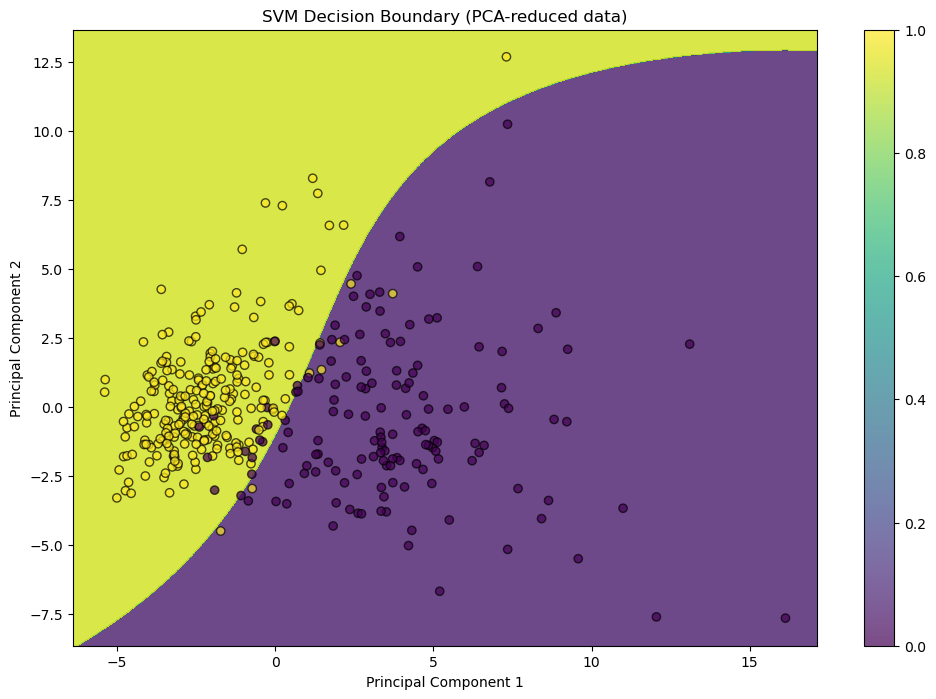

In [166]:
# this cell is complete
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', alpha=0.7)
plt.title('SVM Decision Boundary (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Plot confusion matrix - a confusion matrix is a valuable tool for assessing the classification performance of the model, 
identifying classification errors, and guiding improvements to enhance the accuracy of the SVM model<br><ul>
<li>Top-Left Cell: <br>True Positives (TP) - represents the number of correctly predicted malignant cases.</li>
<li>Lower-Right Cell: <br>True Negatives (TN) - represents the number of correctly predicted benign cases.</li>
<li>Top-Right Cell: <br>False Positives (FP) - the number of incorrect predictions in the positive class (malignant) when the actual class was negative (benign).</li>
<li>Lower-Left Cell: <br>False Negatives (FN) - the number of incorrect predictions in the negative class (benign) when the actual class was positive (malignant).</li>
</ul>

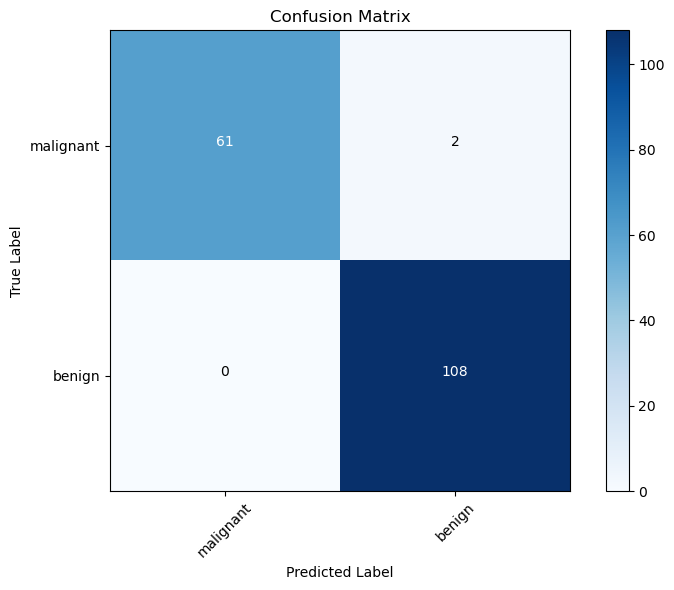

In [169]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cancer.target_names))
plt.xticks(tick_marks, cancer.target_names, rotation=45)
plt.yticks(tick_marks, cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# this part of the cell is complete
# Add text annotations to the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()